<a href="https://colab.research.google.com/github/fridymandita/KCBV/blob/main/Dasar_Pengolahan_Citra_Dengan_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dasar Pengolahan Citra Dengan OpenCV

## Load Data

OpenCV merupakan salah satu modul Python yang digunakan untuk pengolahan citra pada *level rendah*.OpenCV menyediakan fungsi-fungsi yang paling mendasar hingga cukup kompleks untuk pengolahan citra dalam *computer vision*. 

![](https://circuitdigest.com/sites/default/files/projectimage_tut/Real-Life-Object-Detection-Using-computer-vision-for-the-detection-of-face.jpg)

Pada minggu ini akan dibahas secara khusus mengenai penggunaan OpenCV untuk melakukan pengolahan citra sederhana.

Untuk pertemuan kali ini, pelajari kembali mengenai cara untuk mengunggah dan menggunakan berkas (misalnya file foto) pada Google Colab. Cara lain yang dapat dilakukan adalah dengan menggunakan fungsi *upload file* pada Google Colab. Untuk latihan ini, unggah file '**orange.jpg**' dari link berikut:

https://drive.google.com/uc?id=1kc8QA4GIHqaQusFlcGd91cUNnb3nr7GU

In [1]:
# upload file yang sudah diunduh
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving orange.jpg to orange.jpg


Untuk mengecek apakah file '**orange.jpg**' sudah diunggah ke drive, kita dapat lakukan proses cek dari file yang sudah diunggah dengan cara  memeriksa isi dari folder. Perintah `ls` merupakan perintah Linux untuk keperluan ini.

In [2]:
!ls

orange.jpg  sample_data


## Menggunakan OpenCV

Untuk menggunakan OpenCV, kita akan memanggil fungsi **cv2** dari library OpenCV versi 4 yang sudah tersedia pada Google Colab. Untuk itu, kita tidak perlu melakukan instalasi modul ini menggunakan perintah `pip` seperti yang kita lakukan pada modul **rasterio** di latihan sebelumnya. Kita langsung dapat memanggil modul-modul **cv2** menggunakan perintah:

```
import cv2
```

Khusus untuk penggunaan OpenCV di Google Colab, terdapat satu fungsi yang memerlukan *patch* atau perbaikan, yaitu ```cv2.imshow()```. Fungsi ini digunakan untuk menampilkan gambar pada OpenCV. Di Google Colab, fungsi ini digantikan dengan baris perintah berikut:

``` from google.colab.patches import cv2_imshow ```

selanjutnya fungsi ```cv2.imshow()``` digantikan dengan fungsi ```cv2_imshow()```.

Untuk mencoba, jalankan baris perintah berikut:

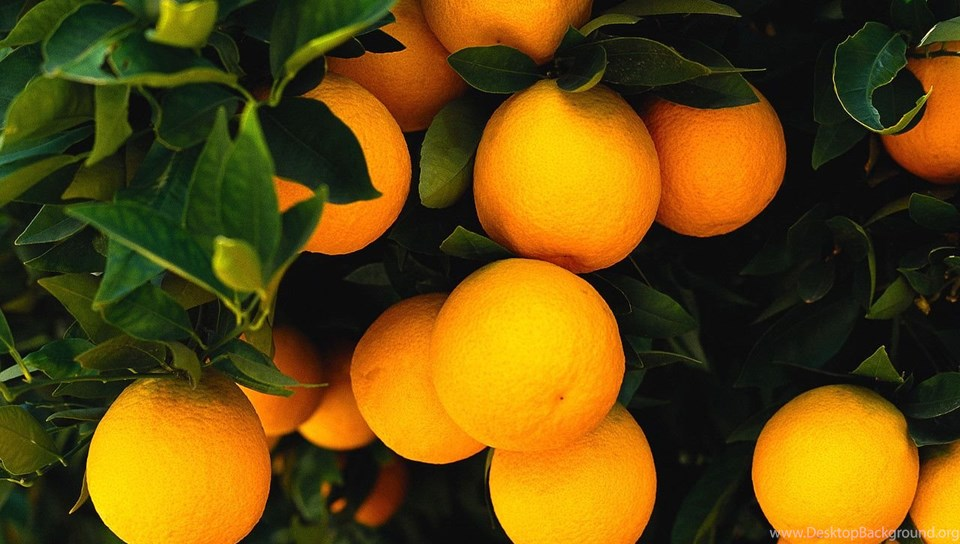

<class 'numpy.ndarray'>


In [3]:
# memanggil library opencv
import cv2

# memanggil fungsi google colab untuk perbaikan cv2.imshow
from google.colab.patches import cv2_imshow

# menyimpan gambar dengan fungsi imread dari OpenCV
img = cv2.imread("orange.jpg")  
# sesuaikan dengan nama file yang diunggah pada cell sebelumnya

# menampilkan gambar dengan fungsi cv2_imshow
cv2_imshow(img)

# lihat tipe data img. disimpan sebagai apa?
print(type(img))


**Keterangan:**

*import*	adalah fungsi Python untuk memanggil modul di luar fungsi dasar yang disediakan

*cv2*	adalah nama modul Python yang digunakan untuk memanggil fungsi-fungsi OpenCV

*numpy*	modul Python untuk pengolahan matriks (ingat bahwa citra pada OpenCV dianggap sebagai matrix)
matplotlib	modul Python untuk melakukan fungsi plotting

*cv2.imread*	perintah yang digunakan pada modul cv2 untuk memanggil citra

*cv2_imshow*	perintah yang digunakan pada modul cv2 untuk menampilkan citra. Argumen yang diperlukan adalah nama  citra yang dipanggil

Perintah di atas menggunakan *cv2.imread* untuk memanggil citra. Pada script di atas, 

```img = cv2.imread('orange.jpg')```

menunjukkan bahwa citra ‘orange.jpg’ disimpan pada variable bernama ```img```.

Selain fungsi **imshow** di atas, dapat digunakan juga Matplotlib untuk menampilkan gambar. Kode yang digunakan adalah ```plt.imshow()``` dengan terlebih dulu memanggil fungsi ```plt``` dari library Matplotlib:


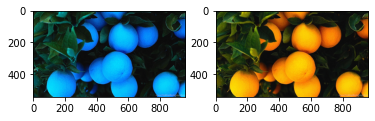

In [4]:
# memanggil fungsi plt dari matplotlib
from matplotlib import pyplot as plt

# membuat sebuah variabel kosong 'fig'
fig = plt.figure()
fig.add_subplot(121)
# subplot (jumlah baris, jumlah kolom, urutan)

# menampilkan gambar dengan fungsi plt
plt.imshow(img)

# plotting gambar
fig.add_subplot(122)
# subplot, formatnya: (jumlah baris, jumlah kolom, urutan)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)


plt.show() #untuk menampilkan plot

Perintah lain yang dapat digunakan untuk mengakses properti citra ```img``` adalah:

In [5]:
print(img.shape) #menampilkan resolusi
print(img.size) #menampilkan ukuran data pada media penyimpan
print(img.dtype) #image datatype (kedalaman bit) 

(544, 960, 3)
1566720
uint8


## Ekstraksi Band

Sebuah citra dapat dipecah pada band penyusunnya dengan menggunakan perintah ```cv2.split()```.

In [6]:
# Band blue, green dan red masng-masing disimpan pada variabel b,g,r
b, g, r = cv2.split(img)

atau bisa juga dengan menggunakan operasi index pada matriks img:

In [7]:
b = img[...,0]  # blue channel
g = img[...,1]  # green channel
r = img[...,2]  # red channel




Perhatikan bagaimana tiap band disusun pada variabel yang menyimpan gambar: *masing-masing band disusun sebagai sebuah array di dalam array*. Ingat bahwa pada Python, index sebuah array **dimulai dari angka nol**. 

Selanjutnya masing-masing band dapat ditampilkan dengan menggunakan ```cv2_imshow``` atau ```plt.imshow```:

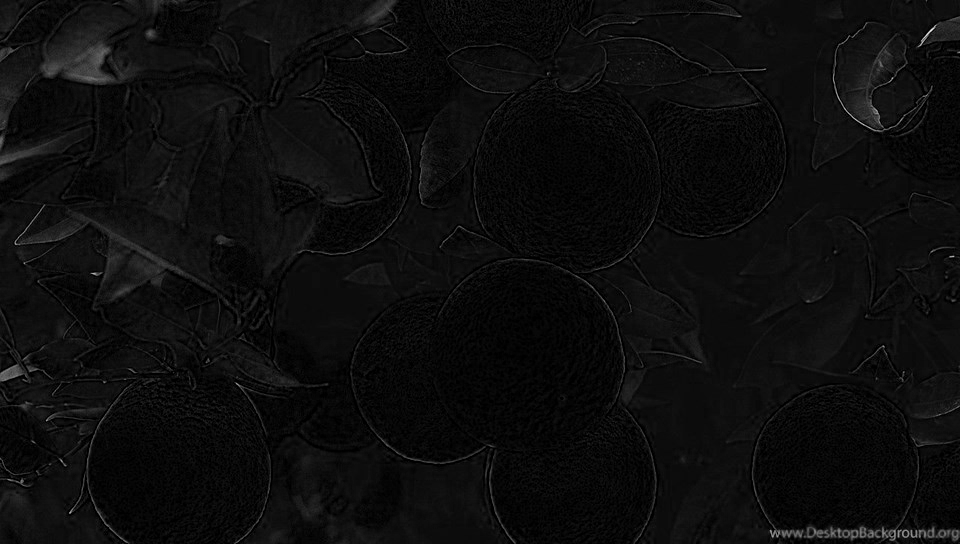

In [8]:
cv2_imshow(b); # menampilkan band biru

## Transformasi ColourSpace

Citra pada OpenCV disimpan dalam susunan BGR (*Blue, Green, Red*). Adakalanya untuk berbagai keperluan perlu dilakukan transformasi colorspace BGR menjadi format lain, misalnya HSV (*Hue Saturation Value*). Penggunaan Colorspace HSV bertujuan untuk mendekati bagaimana cara mata manusia mengenali warna. Contoh penggunaannya adalah untuk melakukan ekstraksi objek berdasarkan warna dan kecerahannya.

> Pelajaran yang dapat diambil adalah bahwa tiap program pengolah citra dapat memiliki susunan *colorspace* yang berbeda. Perhatikan bagaimana pengaruh susunan band ini terhadap komposit citra yang dihasilkan


In [9]:
# konversi BGR dari variable img ke colorspace HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV);

Fungsi di atas mentransformasi citra 'img' ke dalam kelas warna HSV menggunakan fungsi COLOR_BGR2HSV. Untuk fungsi transformasi lain silahkan merujuk dokumentasi OpenCV.
Hasil konversi juga dapat dipecah ke dalam masing-masing band:

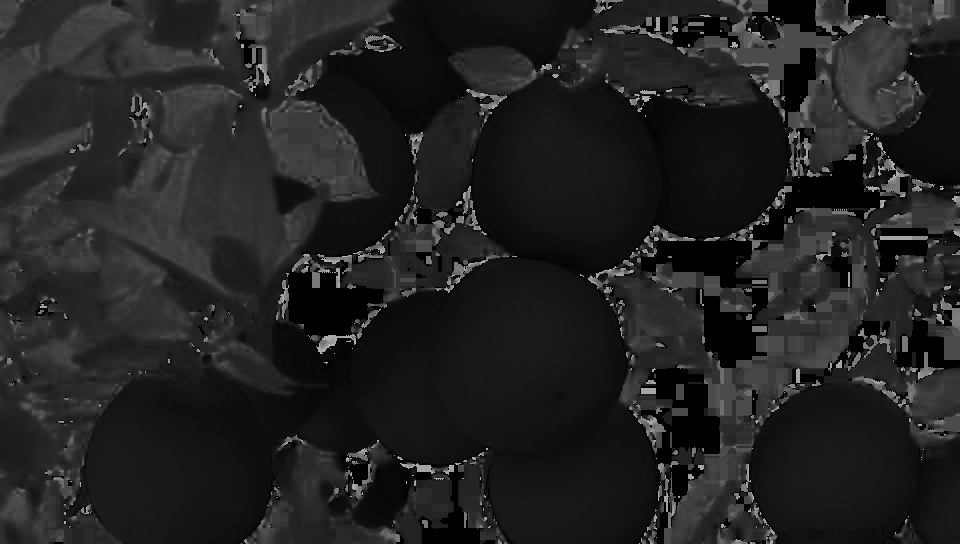

In [10]:
# memisahkan hue, saturation dan value
h, s, v = cv2.split(hsv)

# menampilkan band hue
cv2_imshow(h)

## Menampilkan Histogram Citra

Histogram dapat ditampilkan dengan menggunakan banyak cara. Fungsi yang dapat digunakan antara lain ```cv2.calcHist()```, ```np.histogram()``` dan ```plt.hist()```.

Adapun parameter untuk fungsi cv2.calcHist() adalah sebagai berikut:

```cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])```

* images : gambar yang dibaca menggunakan fungsi cv.read dengan type uint8 or float32. Gambar ini harus dinyatakan sebagai sebuah array dengan kurung siku "[img]".
* channels : band yang akan dihitung histogramnya. Gunakan [0] untuk citra *grayscale*. Untuk citra berwarna, kita dapat berikan nilai [0], [1] atau [2] untuk menghitung histogram dari masing-masing band.
* mask : digunakan apabila kita ingin memperoleh histogram dari sebagian citra saja. 
* histSize : Ukuran histogram, atau banyaknya kolom yang digambar. Kita dapat gunakan nilai sesuai dengan jumlah pixel [256].
* ranges : rentang nilai. Pada citra 8 bit, nilainya adalah [0,256].

Baca pada [rujukan berikut](https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html) untuk lebih lengkapnya


Berikut adalah contoh kode untuk memanggil histogram:

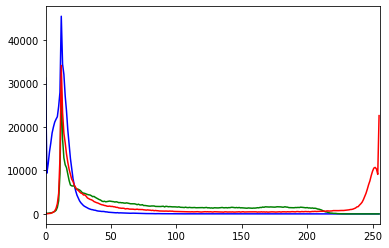

In [11]:
# memanggil library yang dibutuhkan
import cv2
import numpy as np
from matplotlib import pyplot as plt

# jika file baymax.jpg yang digunakan, hilangkan tanda komentar
# img = cv2.imread(‘Baymax.jpg')

color = ('b','g','r')
for i,col in enumerate(color):
  histr = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.show()